In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_excel('../Dataset/stock portfolio performance data set.xlsx')

In [3]:
df.head()

,ID,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return,Excess Return,Systematic Risk,Total Risk,Abs. Win Rate,Rel. Win Rate
0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.139,0.010,1.33,0.149,0.663,0.525
1,2,0.0,1.0,0.0,0.0,0.0,0.0,0.143,0.010,1.17,0.108,0.663,0.650
2,3,0.0,0.0,1.0,0.0,0.0,0.0,0.173,0.018,1.30,0.144,0.638,0.513
3,4,0.0,0.0,0.0,1.0,0.0,0.0,0.096,-0.002,1.39,0.144,0.613,0.475
4,5,0.0,0.0,0.0,0.0,1.0,0.0,0.096,0.001,1.04,0.087,0.725,0.538


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ID                                       63 non-null     int64  
 1    Large B/P                               63 non-null     float64
 2    Large ROE                               63 non-null     float64
 3    Large S/P                               63 non-null     float64
 4    Large Return Rate in the last quarter   63 non-null     float64
 5    Large Market Value                      63 non-null     float64
 6    Small systematic Risk                   63 non-null     float64
 7   Annual Return                            63 non-null     float64
 8   Excess Return                            63 non-null     float64
 9   Systematic Risk                          63 non-null     float64
 10  Total Risk                               63 non-null

In [5]:
df.describe()

,ID,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return,Excess Return,Systematic Risk,Total Risk,Abs. Win Rate,Rel. Win Rate
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,32.000000,0.166619,0.166619,0.166619,0.166619,0.166619,0.166619,0.149238,0.014746,1.035873,0.106317,0.677397,0.573460
std,18.330303,0.199304,0.199304,0.199304,0.199304,0.199304,0.199304,0.027872,0.007101,0.112173,0.014277,0.035196,0.056496
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070000,-0.005000,0.820000,0.086000,0.563000,0.450000
25%,16.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.138000,0.012000,0.970000,0.096500,0.663000,0.525000
50%,32.000000,0.167000,0.167000,0.167000,0.167000,0.167000,0.167000,0.153000,0.015000,1.010000,0.104000,0.675000,0.575000
75%,47.500000,0.291500,0.291500,0.291500,0.291500,0.291500,0.291500,0.170000,0.019500,1.080000,0.113000,0.700000,0.625000
max,63.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.195000,0.026000,1.390000,0.149000,0.750000,0.663000


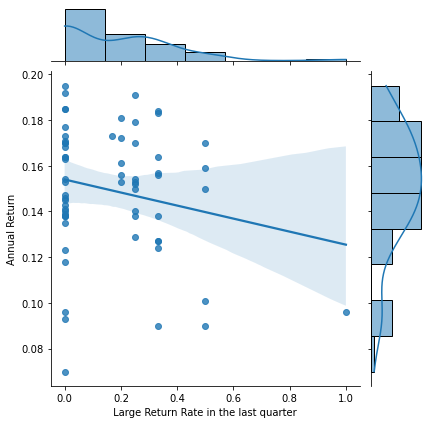

In [6]:
sns.jointplot(x=df[' Large Return Rate in the last quarter '], y=df['Annual Return'], data=df, kind='reg')

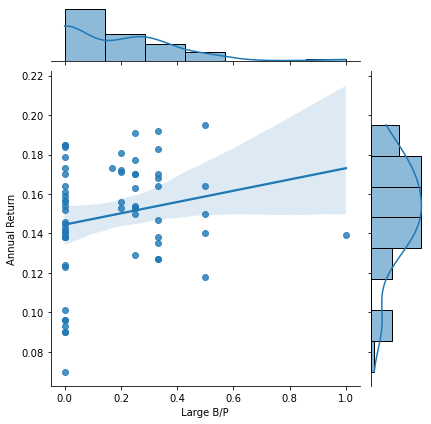

In [7]:
sns.jointplot(x=df[' Large B/P '], y=df['Annual Return'], data=df, kind='reg')

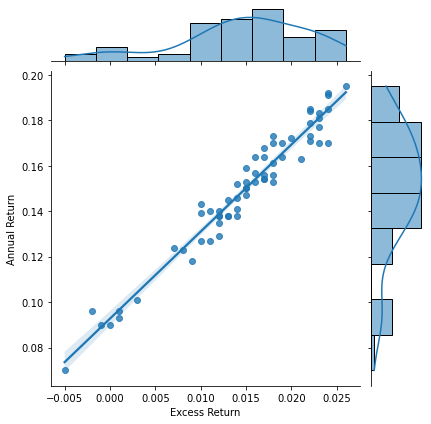

In [8]:
sns.jointplot(x=df['Excess Return'], y=df['Annual Return'], data=df, kind='reg')

In [9]:
X = df['Excess Return']
Y = df['Annual Return']


In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

x_train = np.reshape(x_train, (-1,1))
x_test = np.reshape(x_test, (-1,1))
y_train = np.reshape(y_train, (-1,1))
y_test = np.reshape(y_test, (-1,1))

print('Train - Predictors shape', x_train.shape)
print('Test - Predictors shape', x_test.shape)
print('Train - Target shape', y_train.shape)
print('Test - Target shape', y_test.shape)

Train - Predictors shape (50, 1)
Test - Predictors shape (13, 1)
Train - Target shape (50, 1)
Test - Target shape (13, 1)


In [11]:
# calculate co-efficient
def theta_calc(x_train, y_train): 
    #Initializing all variables
    n_data = x_train.shape[0]
    
    bias = np.ones((n_data,1))
    x_train_b = np.append(bias, x_train, axis=1)

    theta_1 = np.linalg.inv(np.dot(x_train_b.T,x_train_b))
    theta_2 = np.dot(theta_1, x_train_b.T)
    theta = np.dot(theta_2,y_train)

    return theta

In [12]:
def predict_func(slope,intercept,x_test):
    
    pred = []
    n_data = x_test.shape[0]
    for i in range(n_data):
        pred.append((slope * x_test[i] + intercept))
             
    return pred

In [13]:
def mse_calc(prediction, y_test):
    
    total_data = len(prediction)
    error = 0
    error = (np.sum((prediction - y_test)**2))/total_data
    return error

In [14]:
def rsq(prediction, y_test):

    total_data = len(prediction)
    
    #Average of total prediction 
    y_avg = np.sum(y_test)/total_data
    
    #total sum of square error
    tot_err = np.sum((y_test-y_avg)**2)
    
    #total sum of squared error of residuals
    res_err = np.sum((y_test-prediction)**2)
    r2 = 1 - (res_err / tot_err)
    return r2

In [15]:
#Finding optimal theta value using normal equations
theta = theta_calc(x_train, y_train)
intercept = theta[0]
slope = theta[1]
print('Intercept of the model', intercept)
print('Slope of the model', slope)

Intercept of the model [0.09375779]
Slope of the model [3.78354158]


In [16]:
#Prediction calculation
prediction = predict_func(slope, intercept, x_test)

In [17]:
#R-square calculation
r2_val = rsq(prediction, y_test)
print('R squared value', r2_val)

R squared value 0.973080429575225


In [18]:
#MSE calculation
pred_df = pd.DataFrame(prediction)
pred_df.columns=['Annual Return']
error =  mse_calc(prediction, y_test)
print('Mean squared error of the model', error)

Mean squared error of the model 2.2290041461309546e-05


In [19]:
error = (np.sum((prediction - y_test)**2))/len(prediction)
error

2.2290041461309546e-05

Text(0, 0.5, 'Excess Return')

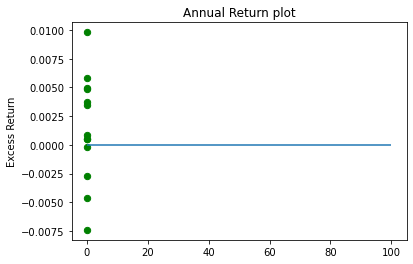

In [20]:
#Residual plot
plt.scatter(prediction, prediction - y_test, c='g', s = 40)
plt.hlines(y=0, xmin=0, xmax=100)
plt.title('Annual Return plot')
plt.ylabel('Excess Return')

In [21]:
pred_df.head()

,Annual Return
0,0.161862
1,0.180779
2,0.131593
3,0.150511
4,0.074840


In [22]:
y_test[1:6]

array([[0.181],
       [0.139],
       [0.15 ],
       [0.07 ],
       [0.157]])

## Using Scikit Learn

In [23]:
cls = LinearRegression()
cls.fit(x_train,y_train)

LinearRegression()

In [24]:
print('Co-efficient of linear regression',cls.coef_)

Co-efficient of linear regression [[3.78354158]]


In [25]:
print('Intercept of linear regression model',cls.intercept_)

Intercept of linear regression model [0.09375779]


In [26]:
print('Mean Square Error', mean_squared_error(y_test, prediction))

Mean Square Error 2.2290041461309546e-05


In [27]:
print('Model R^2 Square value', r2_score(y_test, prediction))

Model R^2 Square value 0.973080429575225


Text(0.5, 1.0, 'Linear Regression')

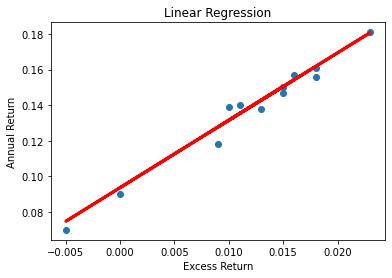

In [28]:
plt.scatter(x_test, y_test)
plt.plot(x_test, prediction, color='red', linewidth=3)
plt.xlabel('Excess Return')
plt.ylabel('Annual Return')
plt.title('Linear Regression')

Text(0, 0.5, 'Annual Return')

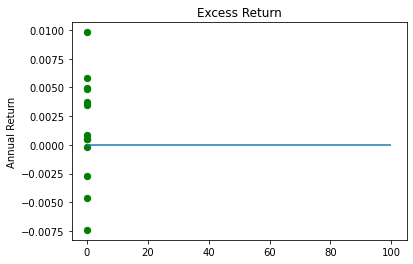

In [29]:
#Residual plot
plt.scatter(cls.predict(x_test), cls.predict(x_test) - y_test, c='g', s = 40)
plt.hlines(y=0, xmin=0, xmax=100)
plt.title('Excess Return')
plt.ylabel('Annual Return')